In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from scipy.signal import find_peaks
from scipy import signal
import os

from pathlib import Path

import pickle

path_aurora_dataset = Path('/Users/cslinxs/Desktop/aurora_dataset/aurora_dataset/')


def reject_outliers(data):
    #return data[abs(data - np.mean(data)) < 0.3 * np.mean(data)]
    return data[abs(data - np.mean(data)) <3 * np.std(data)]



dictionary_path = "/Users/cslinxs/Desktop/all_weeks/summer24-lab/measurements_auscultatory_dictionary_ALL.pkl"

with open(dictionary_path, 'rb') as handle:
    all_auscultatory_dic = pickle.load(handle)


#https://www.youtube.com/watch?v=q_HS4s1L8UI

In [25]:
# for person in sorted(os.listdir(path_aurora_dataset/"measurements_auscultatory"))[:2]:
#     if "a" in person:
#         filler_to_person = basic_mesures_data[basic_mesures_data["pid"] == person]
#         print("hi")
#         for each_path in filler_to_person["waveform_file_path"]:
#             flatlined_data = get_even_split(path_aurora_dataset/each_path)
#             print(flatlined_data)

            
#             # here he made a copy of the data fram with everything shirted back 7 cuz 7 days
#             # i think I should skip using the averge distance
#             look_back = 7
#             shifted_df = prepare_data_frame_for_lstm(flatlined_data, )


            


In [26]:
import pandas as pd
import torch 
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [263]:
path_aurora_dataset = Path('/Users/cslinxs/Desktop/aurora_dataset/aurora_dataset/')
auscultatory_data = path_aurora_dataset / "measurements_auscultatory.tsv"

participants_data =  path_aurora_dataset / "participants.tsv"
basic_mesures_data = pd.read_csv(auscultatory_data,sep = '\t').dropna(subset=["waveform_file_path"]).dropna(subset=["sbp"]).dropna(subset=["dbp"]) 

def get_even_split(path):
    #print(path)
    df = pd.read_csv(path,sep = '\t')   
    pos_pressure = df["pressure"]

    neglist = [ -x for x in pos_pressure]

    b, a = signal.butter(1, 0.002, analog=False)
    gustafsson_avg = signal.filtfilt(b, a, x= pos_pressure, method="gust")
    y_flater = [real_pre-abs( guston_avg) for real_pre, guston_avg in zip(pos_pressure, gustafsson_avg)]

    y_flater = np.array(y_flater)
    neglist = [ -x for x in y_flater]

    neg_max_values = max(neglist)
    neg_mix_values = min(neglist)
    mid_neg_value= neg_max_values - neg_mix_values

    min_height = neg_max_values - mid_neg_value*0.30 

    min_peaks, _ = find_peaks(neglist , height= min_height, width=80)


    most_accurate_mins = min_peaks
    diffrences_new_min = reject_outliers(np.diff(most_accurate_mins))
    diffrences_new_min
    plt.plot(y_flater)
    
    plt.show()
    return  y_flater # (len(diffrences_new_min.mean()), pos_pressure)#len(diffrences_new_min.mean())
 

def prepare_data_frame_for_lstm(df,n_steps,pos_pressure ):
    df = df.pandas(df)
    for i in range(1, n_steps+1):
        df[f"shift \(t-{i})"] = pos_pressure.shift(i)


# everything[each_path] = [each_path_50_cords, filler_to_person[filler_to_person["waveform_file_path"] == each_path]["sbp"], 
#                          filler_to_person[filler_to_person["waveform_file_path"] == each_path]["dbp"] ]

        

In [264]:
# def iterate_minibatches(inputs,targets, batchsize, shuffle= False):
#     if shuffle:
#         indices = np.arrange(len(inputs))
#         np.random.shuffle(indices)
#     for start_idx in range(0, len(inputs)-batchsize+1,batchsize):
#         if shuffle:
#             excerp = indices[start_idx: start_idx+batchsize]
#         else:
#             excerp = slice(start_idx, start_idx + batchsize)
#             # indices[start_idx: start_idx+batchsize]
#         yield inputs[excerp], targets[excerp]

# class CNN1_Net(nn.Module):
#     def __init__(self, kernel_size_1 =5,
#                  stride_size=1, num_channels =1, depth_1 =1, depth_2 =5, 
#                  kernel_size_2 =5, num_hidden =20, num_labels =5):
#         super(CNN1_Net, self).__init__()

#         self.classifer = nn.Sequential(
#             nn.Conv1d(num_channels, depth_1, kernel_size=kernel_size_1)
#         )

#         self.fc1 = nn.Sequential(nn.Linear(depth_2*kernel_size_2,num_hidden),
#                                  nn.ReLU(),
#                                  nn.Dropout(0.5)
#                                  )
#         self.fc2 = nn.Sequential(nn.Linear(num_hidden, num_labels),
#                                  nn.ReLU(),
#                                  nn.Dropout(0.5)
#                                  )

#     def forward(self, x):
#         x = self.classifer(x)
#         print(x)
#         return x

hi
measurements_auscultatory/a000/a000.initial.Exercise_challenge_start_1.tsv


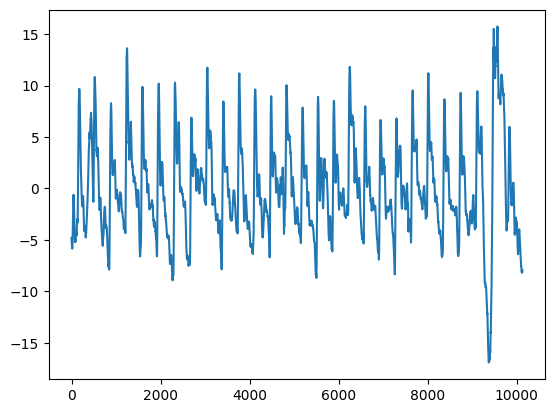

measurements_auscultatory/a000/a000.initial.Exercise_challenge_start_2.tsv


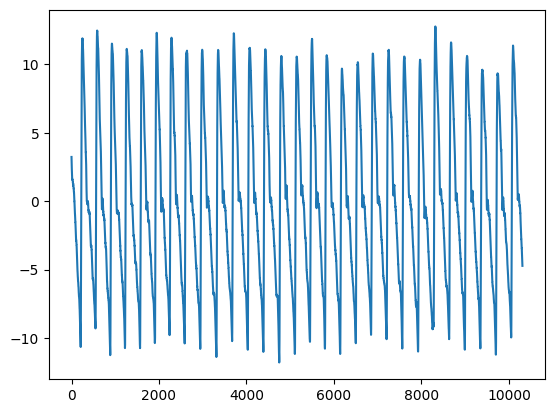

In [265]:
all_data_recordings = []

for person in sorted(os.listdir(path_aurora_dataset/"measurements_auscultatory"))[:2]:
    if "a" in person:
        filler_to_person = basic_mesures_data[basic_mesures_data["pid"] == person]
        print("hi")
        for each_path in filler_to_person["waveform_file_path"]:
            if "Exercise" in each_path:
                print(each_path)
                flatlined_data = get_even_split(path_aurora_dataset/each_path)
                all_data_recordings.append(flatlined_data)

In [266]:
# #https://www.youtube.com/watch?v=W58HaGKhjWg
# net = nn.Conv1d(1,1,5, bias =False)
# optimzer = optim.Adam(net.parameters(), lr=0.01)
# running_loss = 0.0

# X = list(range(len(all_data_recordings[0])))
# Y = all_data_recordings[0]

# print(len(X), len(Y))

# X_tensor = torch.Tensor(X).reshape(1,1,-1)
# print("Times", X_tensor)

# Y_tensor = torch.Tensor(Y).reshape(1,1,-1)
# print("Pressure", Y_tensor)


# ts_tensor = torch.Tensor(X).reshape(1,1,-1)
# kernel = [-40,40]
# kernel_tensor = torch.tensor(kernel).reshape(1,1,-1)
# #print("Kernel",  nn.Conv1d(ts_tensor,kernel_tensor))


# for epoch in range(100):
#     #print("start")
#     optimzer.zero_grad()
#     outputs = net(X_tensor)
    
#     #print("hi",(outputs),(Y_tensor))

#     #This is an iss
#     print(len(outputs[0][0]), len(Y_tensor[0][0]))
#     loss_value = torch.mean(outputs**2)
#     loss_value.backward()

#     optimzer.step()

#     running_loss + loss_value.item()
#     # if epoch %100 ==0:
#     #     print(net.weight.data.numpy())

# prediction = (net(X_tensor).data).float()
# prediction =  prediction.numpy().flatten()
# plt.title("Using 1d tensors")
# plt.plot(prediction)
# plt.plot(Y)


In [267]:
#https://www.youtube.com/watch?v=q_HS4s1L8UI
# https://colab.research.google.com/drive/1CBIdPxHn_W2ARx4VozRLIptBrXk7ZBoM?usp=sharing#scrollTo=-Xon2PHWno7t
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn


In [268]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    print(df)
    for i in range(100):
        print(df[i])
    # for i in range(1, n_steps+1):
    #     df[f'Close(t-{i})'] = df[i].shift(i)

    # df.dropna(inplace=True)

    # return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(np.array(all_data_recordings[0]), lookback)
shifted_df

[-4.81614166 -4.91633278 -5.016718   ... -8.04705951 -8.04642814
 -7.94611344]
-4.816141658978495
-4.916332782734344
-5.016717998721333
-5.1173012700544405
-5.118085580690604
-5.219072935547274
-5.320266334533926
-5.421669772671521
-5.523287253273793
-5.525121801126488
-5.527174475633046
-5.629446344807775
-5.631939472295244
-5.634654943498617
-5.637592865622082
-5.740754341629099
-5.744141470284376
-5.847756359262576
-5.851601125228854
-5.755675919971736
-5.659977943429567
-5.564503417536116
-5.369247586069378
-5.17420372748802
-4.979364141642236
-4.7847211364471605
-4.490266040601682
-4.295989203246563
-4.001880980560372
-3.7079307484013952
-3.4141269018894036
-3.2204588288984723
-3.0269178966177606
-2.833496464231075
-2.6401868956413637
-2.5469825461436812
-2.3538777621638474
-2.1608659070820977
-1.867938373993411
-1.675085572345779
-1.3822979145372756
-1.1895658155367528
-0.8968796925084916
-0.8042309514071349
-0.7116139605934677
-0.6190250636350356
-0.7264625791617618
-0.833928774

In [269]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)


    for i in range(1, n_steps+1):
        df = pd.concat([df, df['pressure'].shift(i).rename(f'Close(t-{i})')], axis=1)
        #pd.concat((df1,df),axis=0)


    
    df.dropna(inplace=True)

    return df

lookback = 400 # this should be the average later

first_dataframe = pd.DataFrame({"pressure":all_data_recordings[0]})
# first_dataframe

shifted_df = prepare_dataframe_for_lstm(first_dataframe, lookback)
shifted_df

,pressure,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7),Close(t-8),Close(t-9),...,Close(t-391),Close(t-392),Close(t-393),Close(t-394),Close(t-395),Close(t-396),Close(t-397),Close(t-398),Close(t-399),Close(t-400)
400,4.937336,4.754270,4.571392,4.488695,4.306174,4.123824,4.041637,3.959610,3.977740,3.996027,...,-5.525122,-5.523287,-5.421670,-5.320266,-5.219073,-5.118086,-5.117301,-5.016718,-4.916333,-4.816142
401,5.020595,4.937336,4.754270,4.571392,4.488695,4.306174,4.123824,4.041637,3.959610,3.977740,...,-5.527174,-5.525122,-5.523287,-5.421670,-5.320266,-5.219073,-5.118086,-5.117301,-5.016718,-4.916333
402,5.204054,5.020595,4.937336,4.754270,4.571392,4.488695,4.306174,4.123824,4.041637,3.959610,...,-5.629446,-5.527174,-5.525122,-5.523287,-5.421670,-5.320266,-5.219073,-5.118086,-5.117301,-5.016718
403,5.287718,5.204054,5.020595,4.937336,4.754270,4.571392,4.488695,4.306174,4.123824,4.041637,...,-5.631939,-5.629446,-5.527174,-5.525122,-5.523287,-5.421670,-5.320266,-5.219073,-5.118086,-5.117301
404,5.371590,5.287718,5.204054,5.020595,4.937336,4.754270,4.571392,4.488695,4.306174,4.123824,...,-5.634655,-5.631939,-5.629446,-5.527174,-5.525122,-5.523287,-5.421670,-5.320266,-5.219073,-5.118086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10125,-8.149280,-8.150873,-8.152787,-8.155023,-8.157581,-8.160461,-8.063663,-8.067183,-8.071022,-8.075180,...,4.192981,4.455185,4.817567,5.080138,5.342909,5.705892,6.069100,6.332547,6.596244,6.760201
10126,-8.148010,-8.149280,-8.150873,-8.152787,-8.155023,-8.157581,-8.160461,-8.063663,-8.067183,-8.071022,...,3.930942,4.192981,4.455185,4.817567,5.080138,5.342909,5.705892,6.069100,6.332547,6.596244
10127,-8.047060,-8.148010,-8.149280,-8.150873,-8.152787,-8.155023,-8.157581,-8.160461,-8.063663,-8.067183,...,3.769059,3.930942,4.192981,4.455185,4.817567,5.080138,5.342909,5.705892,6.069100,6.332547
10128,-8.046428,-8.047060,-8.148010,-8.149280,-8.150873,-8.152787,-8.155023,-8.157581,-8.160461,-8.063663,...,3.507324,3.769059,3.930942,4.192981,4.455185,4.817567,5.080138,5.342909,5.705892,6.069100


In [270]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[ 4.93733563,  4.75426975,  4.57139157, ..., -5.016718  ,
        -4.91633278, -4.81614166],
       [ 5.02059544,  4.93733563,  4.75426975, ..., -5.11730127,
        -5.016718  , -4.91633278],
       [ 5.20405444,  5.02059544,  4.93733563, ..., -5.11808558,
        -5.11730127, -5.016718  ],
       ...,
       [-8.04705951, -8.14800956, -8.14928029, ...,  5.70589199,
         6.0691004 ,  6.33254743],
       [-8.04642814, -8.04705951, -8.14800956, ...,  5.34290885,
         5.70589199,  6.0691004 ],
       [-7.94611344, -8.04642814, -8.04705951, ...,  5.08013762,
         5.34290885,  5.70589199]])

In [271]:
shifted_df_as_np.shape

(9730, 401)

In [272]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[ 0.33839513,  0.3271877 ,  0.31599176, ..., -0.27099957,
        -0.26485391, -0.25872013],
       [ 0.34349236,  0.33839513,  0.3271877 , ..., -0.27715735,
        -0.27099957, -0.26485391],
       [ 0.35472386,  0.34349236,  0.33839513, ..., -0.27720537,
        -0.27715735, -0.27099957],
       ...,
       [-0.45651937, -0.46269961, -0.4627774 , ...,  0.38544674,
         0.40768263,  0.42381106],
       [-0.45648071, -0.45651937, -0.46269961, ...,  0.36322463,
         0.38544674,  0.40768263],
       [-0.45033937, -0.45648071, -0.45651937, ...,  0.34713758,
         0.36322463,  0.38544674]])

In [273]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((9730, 400), (9730,))

In [274]:
X = dc(np.flip(X, axis=1))
X

array([[-0.25872013, -0.26485391, -0.27099957, ...,  0.31092901,
         0.31599176,  0.3271877 ],
       [-0.26485391, -0.27099957, -0.27715735, ...,  0.31599176,
         0.3271877 ,  0.33839513],
       [-0.27099957, -0.27715735, -0.27720537, ...,  0.3271877 ,
         0.33839513,  0.34349236],
       ...,
       [ 0.42381106,  0.40768263,  0.38544674, ..., -0.46287489,
        -0.4627774 , -0.46269961],
       [ 0.40768263,  0.38544674,  0.36322463, ..., -0.4627774 ,
        -0.46269961, -0.45651937],
       [ 0.38544674,  0.36322463,  0.34713758, ..., -0.46269961,
        -0.45651937, -0.45648071]])

In [275]:
split_index = int(len(X) * 0.95)

split_index

9243

In [276]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9243, 400), (487, 400), (9243,), (487,))

In [277]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9243, 400, 1), (487, 400, 1), (9243, 1), (487, 1))

In [278]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([9243, 400, 1]),
 torch.Size([487, 400, 1]),
 torch.Size([9243, 1]),
 torch.Size([487, 1]))

In [279]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [280]:
train_dataset

In [281]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [282]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 400, 1]) torch.Size([16, 1])


In [283]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [284]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [285]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [286]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [288]:
learning_rate = 0.01
num_epochs = 2
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000

Val Loss: 0.000
***************************************************

Epoch: 2
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000

Val Loss: 0.000
***************************************************



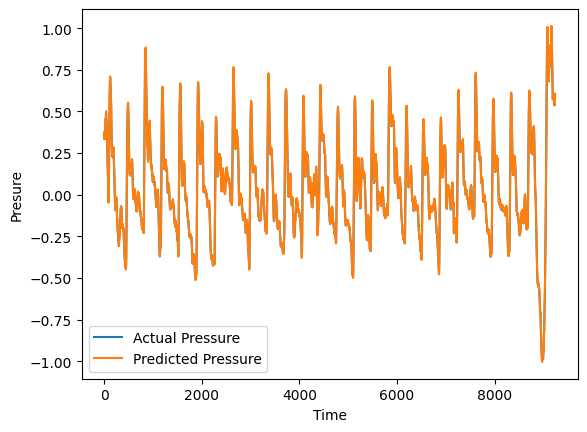

In [289]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Pressure')
plt.plot(predicted, label='Predicted Pressure')
plt.xlabel('Time')
plt.ylabel('Presure')
plt.legend()
plt.show()


In [ ]:
#https://towardsdatascience.com/exploring-the-lstm-neural-network-model-for-time-series-8b7685aa8cf

#another more simple way

In [262]:
#https://towardsdatascience.com/exploring-the-lstm-neural-network-model-for-time-series-8b7685aa8cf

import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

# df = pd.DataFrame({"pressure":all_data_recordings[0]})

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [253]:
f = Forecaster(
 
  current_dates=df["pressure"]
 )
f


NameError: name 'Forecaster' is not defined